# Fitting crltvsmdidaynumber6h.dat3 into a cosine+sine expression

Import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

Read in the crltvsmdidaynumber6h.dat3 from the rotationproject

In [2]:
# The new dataset
df = pd.read_csv('crltvsmdidaynumber6h.dat3', delim_whitespace=True, header=None)
df.columns = ['Index', 'index', 'day', 'lat']
df.set_index('Index', inplace=True)
df

,index,day,lat
Index,,,
1,12149760,6328.00,-4.301160
2,12150240,6328.25,-4.259641
3,12150720,6328.50,-4.226103
4,12151200,6328.75,-4.217979
5,12151680,6329.00,-4.201543
...,...,...,...
20988,22223520,11574.75,7.252682
20989,22224000,11575.00,7.257133
20990,22224480,11575.25,7.241822


### Fit into cosine

The curve_fit function requires an initial guess of the parameters. A close enough guess would generate an accurate model.

In [3]:
# Use 'day' as x and 'lat' as y
x = df['day'].values
y = df['lat'].values

In [4]:
# Define the cosine function
def cosine_func(x, A, B, D, E, F):
    return (A * np.cos(B * x)) + (E * np.sin(F * x)) + D

# Manually define Initial guess parameters for a better output
A1 = (df['lat'].max() - df['lat'].min()) * 0.5 
period = 365.0
B1 = 2*np.pi / period
D1 = 0

E1 = 0.135
period2 = period/2
F1 = 2*np.pi / period2

In [5]:
# Initial guess for the parameters [A, B, C, D]  # GPT code
initial_guess = [A1, B1, D1, E1, F1]

# Fit the data using curve_fit
params, covariance = curve_fit(cosine_func, x, y, p0=initial_guess)

# Extract the fitted parameters
A_res, B_res, D_res, E_res, F_res = params

## Result:

We plug in the output parameters and fit them into a cosine+sine function we defined above, and plot the result cosine wave and the error.

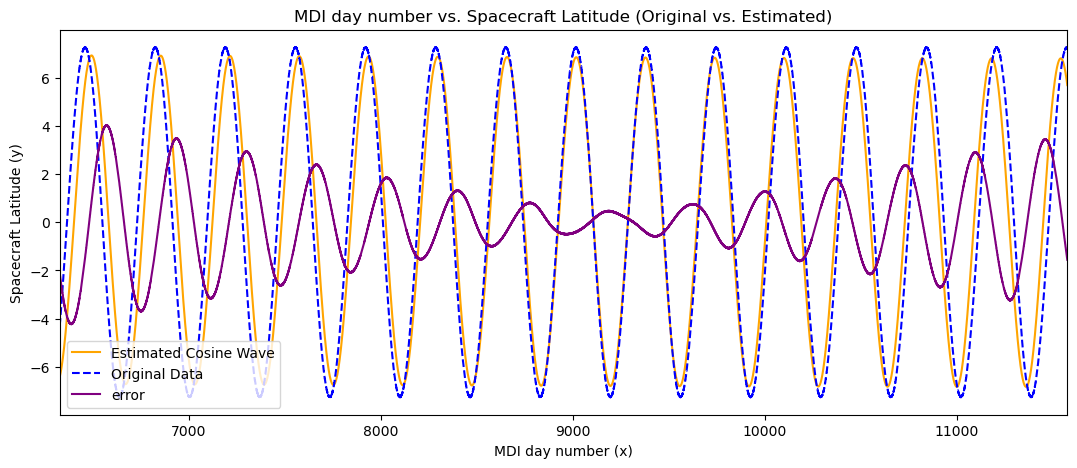

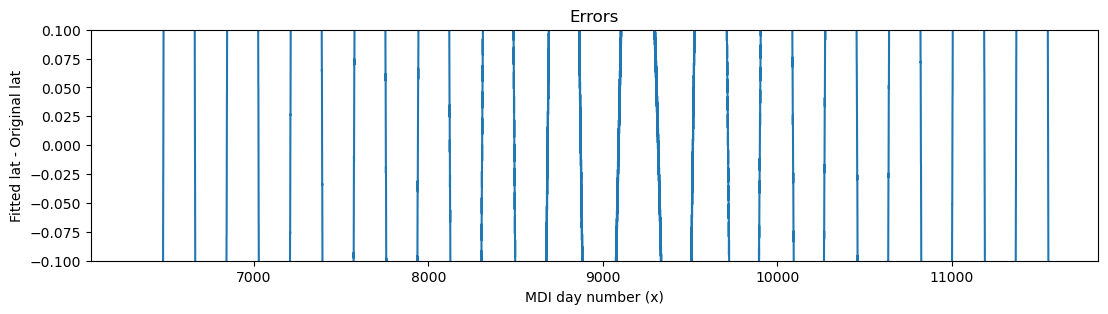

The Cosine Function:

 y = (6.81683773116449*cos(0.017420530801506042x)) + (-0.07864946077498017*sin(0.034443396558850356x)) + 0.061898264089592786

Mean Squared Error: 2.8246498796816373


,index,day,lat,lat_pred,test_error
Index,,,,,
1,12149760,6328.00,-4.301160,-6.413907,-2.112747
2,12150240,6328.25,-4.259641,-6.405351,-2.145710
3,12150720,6328.50,-4.226103,-6.396677,-2.170574
4,12151200,6328.75,-4.217979,-6.387883,-2.169904
5,12151680,6329.00,-4.201543,-6.378972,-2.177429
...,...,...,...,...,...
20988,22223520,11574.75,7.252682,5.753607,-1.499075
20989,22224000,11575.00,7.257133,5.738020,-1.519113
20990,22224480,11575.25,7.241822,5.722326,-1.519496


In [6]:
def get_plot(df=df, A=A_res, B=B_res, D=D_res, E=E_res, F=F_res):
    # Actual data:
    x = df['day'].values
    y = df['lat'].values
    
    # Test data:
    x_test = df['day']
    y_test = [cosine_func(i, A, B, D, E, F) for i in x_test]
    
    # Test error:
    err = []
    for i in range(len(x_test)):
        err.append(y_test[i] - y[i])
    
    plt.figure(figsize=(13, 5))
    # Test
    plt.plot(x_test, y_test, color='orange', label=f'Estimated Cosine Wave')# \ny = {A:.3f}*cos({B:.3f}x + {C:.3f}) + {D:.3f}', color='orange')
    # Original
    plt.plot(x, y, label='Original Data', color = 'blue', linestyle='--')
    # Error
    plt.plot(x_test, err, label='error', color='purple')
    plt.xlim(min(x_test), max(x_test))
    
    plt.xlabel('MDI day number (x)')
    plt.ylabel('Spacecraft Latitude (y)')
    plt.title('MDI day number vs. Spacecraft Latitude (Original vs. Estimated)')
    plt.legend(loc='lower left')
    plt.show()

    # Plot the error alone
    plt.figure(figsize=(13, 3))
    plt.ylim(-0.1, 0.1)
    #plt.xlim(6328, 6330)
    plt.plot(x_test, err)
    plt.title('Errors')
    plt.xlabel('MDI day number (x)')
    plt.ylabel('Fitted lat - Original lat')
    plt.show()
    
    #print(f"Amplitude (A): {A}, \nFrequency-related (B): {B}  =>  Period: {2*np.pi /B}, \nPhase shift (C): {C}, \nVertical offset (D): {D}")
    print(f'The Cosine Function:\n\n y = ({A}*cos({B}x)) + ({E}*sin({F}x)) + {D}')
    df1 = df.copy()
    df1['lat_pred'] = y_test
    df1['test_error'] = err
    # Find Mean Squared Error
    mse = mean_squared_error(y[0:len(y_test)], y_test)
    print("\nMean Squared Error:", mse)
    return df1

get_plot()

### Exporting to .csv

## Testing on the old CRLTVSORB data

We can use the new model to fit on the old data, if it doesn't fit the new data.

In [7]:
df_old = pd.read_csv('crltobsvsdaynumber.dat', delim_whitespace=True, header=None)
df_old.columns = ['Index', 'day', 'lat', 'lat_abs']
df_old.set_index('Index', inplace=True)
df_old

,day,lat,lat_abs
Index,,,
1,6328.5,-4.226103,4.226103
2,6329.5,-4.126043,4.126043
3,6330.5,-4.024859,4.024859
4,6331.5,-3.921519,3.921519
5,6332.5,-3.818179,3.818179
...,...,...,...
4700,11027.5,-7.204974,7.204974
4701,11028.5,-7.191523,7.191523
4702,11029.5,-7.175891,7.175891


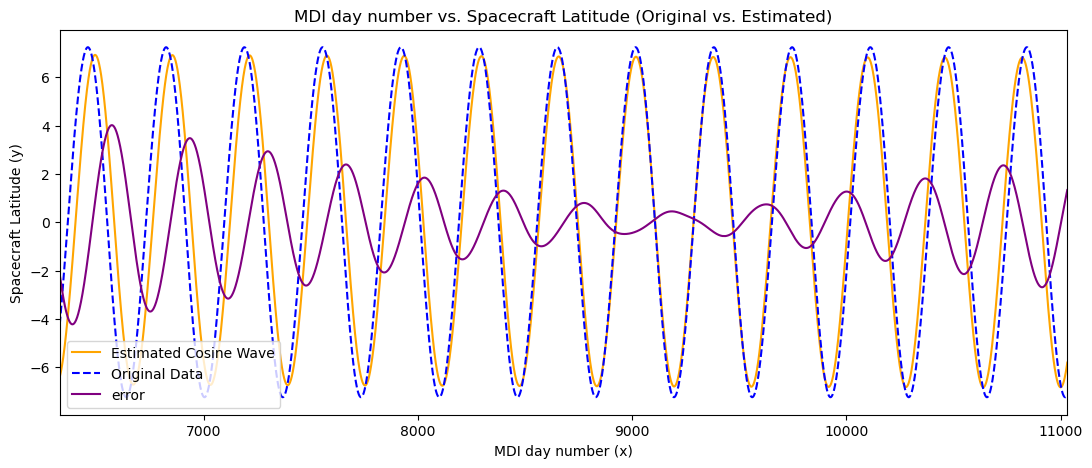

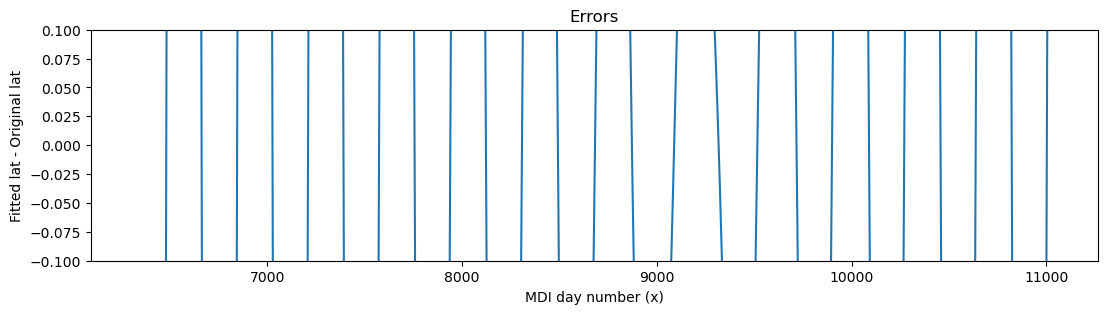

The Cosine Function:

 y = (6.81683773116449*cos(0.017420530801506042x)) + (-0.07864946077498017*sin(0.034443396558850356x)) + 0.061898264089592786

Mean Squared Error: 2.5530723344427564


,day,lat,lat_abs,lat_pred,test_error
Index,,,,,
1,6328.5,-4.226103,4.226103,-6.396677,-2.170574
2,6329.5,-4.126043,4.126043,-6.360795,-2.234752
3,6330.5,-4.024859,4.024859,-6.323030,-2.298171
4,6331.5,-3.921519,3.921519,-6.283393,-2.361874
5,6332.5,-3.818179,3.818179,-6.241898,-2.423719
...,...,...,...,...,...
4700,11027.5,-7.204974,7.204974,-6.046559,1.158415
4701,11028.5,-7.191523,7.191523,-5.989500,1.202023
4702,11029.5,-7.175891,7.175891,-5.930586,1.245305


In [8]:
get_plot(df=df_old)

### Exporting to .csv